In [1]:
#importo librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('default')

sns.set(style="whitegrid")

In [2]:
#cargo csv
events = pd.read_csv('./data/events.csv', low_memory=False)
pd.set_option('display.max_columns', 51)
events.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,criteo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5,1,'Cantidad de checkouts segun ')

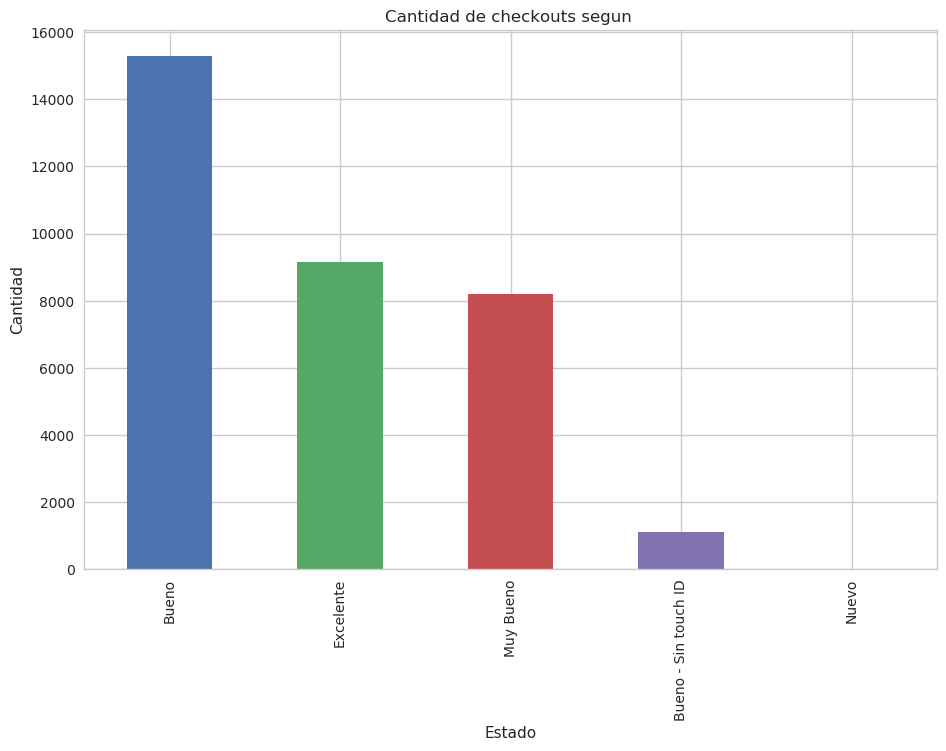

In [19]:
p = events.loc[events['event'] == 'checkout']['condition'].value_counts().plot.bar(figsize=(11,7))
p.set_xticklabels(['Bueno', 'Excelente', 'Muy Bueno', 'Bueno - Sin touch ID', 'Nuevo'])
p.set_ylabel('Cantidad')
p.set_xlabel('Estado')
p.set_title('Cantidad de checkouts segun ')

Text(0.5,1,'Cantidad de conversiones segun condicion')

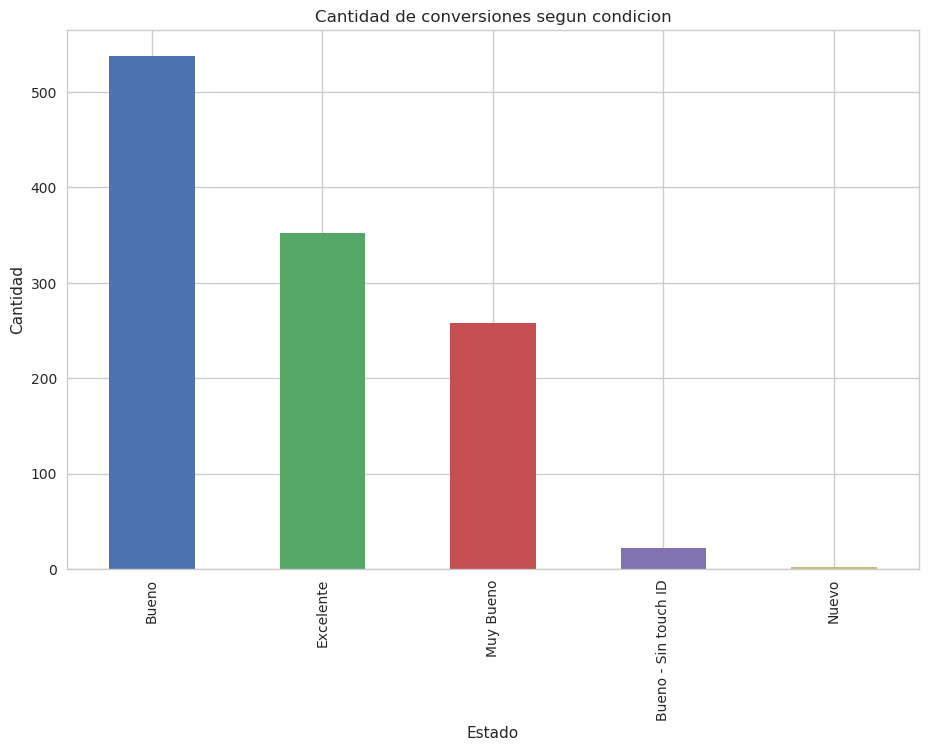

In [23]:
p = events.loc[events['event'] == 'conversion']['condition'].value_counts().plot.bar(figsize=(11,7))
p.set_xticklabels(['Bueno', 'Excelente', 'Muy Bueno', 'Bueno - Sin touch ID', 'Nuevo'])
p.set_ylabel('Cantidad')
p.set_xlabel('Estado')
p.set_title('Cantidad de conversiones segun condicion')

In [5]:
events_short = events.loc[events['event'] == 'conversion']
grouped = events_short.groupby(['model','condition']).agg({'person':'count'})

In [6]:
grouped.sort_values(by='person', inplace=True)

In [7]:
grouped = grouped.pivot_table(index='model', columns='condition', values='person')

In [8]:

grouped['Total'] = grouped.sum(axis=1)
grouped.sort_values(by='Total', inplace=True, ascending=False)

In [9]:
grouped.drop(columns=['Total'], inplace=True)

[Text(0.5,0,'Bueno'),
 Text(1.5,0,'Bueno-Sin Touch ID'),
 Text(2.5,0,'Excelente'),
 Text(3.5,0,'Muy Bueno'),
 Text(4.5,0,'Nuevo')]

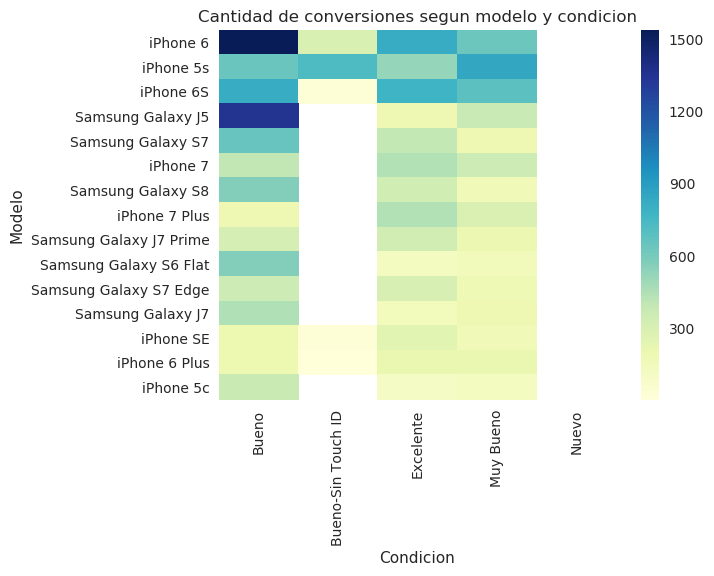

In [22]:
h = sns.heatmap(grouped.head(15), cmap="YlGnBu")
h.set_title('Cantidad de conversiones segun modelo y condicion')
h.set_xlabel('Condicion')
h.set_ylabel('Modelo')
h.set_xticklabels(['Bueno', 'Bueno-Sin Touch ID', 'Excelente', 'Muy Bueno', 'Nuevo'])

In [11]:
events_short = events.loc[events['event'] == 'checkout']
grouped = events_short.groupby(['model','condition']).agg({'person':'count'})
grouped.sort_values(by='person', inplace=True)
grouped = grouped.pivot_table(index='model', columns='condition', values='person')
grouped['Total'] = grouped.sum(axis=1)
grouped.sort_values(by='Total', inplace=True, ascending=False)
grouped.drop(columns=['Total'], inplace=True)

[Text(0.5,0,'Bueno'),
 Text(1.5,0,'Bueno-Sin Touch ID'),
 Text(2.5,0,'Excelente'),
 Text(3.5,0,'Muy Bueno'),
 Text(4.5,0,'Nuevo')]

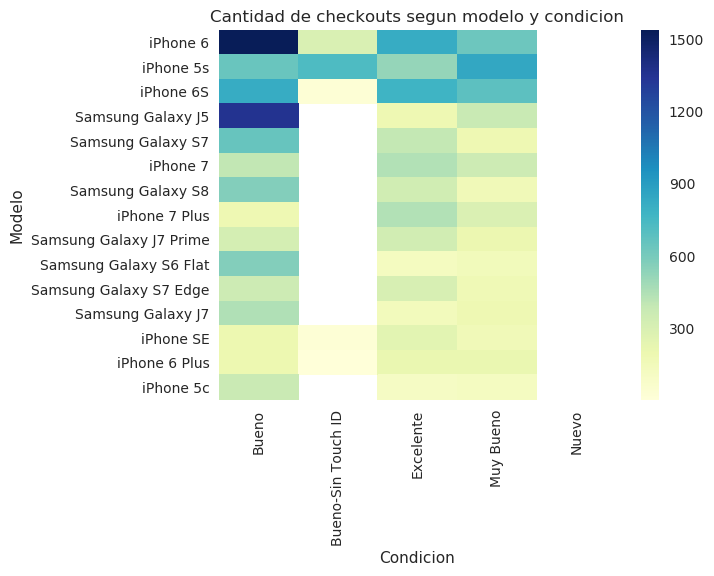

In [21]:
h = sns.heatmap(grouped.head(15), cmap="YlGnBu")
h.set_title('Cantidad de checkouts segun modelo y condicion')
h.set_xlabel('Condicion')
h.set_ylabel('Modelo')
h.set_xticklabels(['Bueno', 'Bueno-Sin Touch ID', 'Excelente', 'Muy Bueno', 'Nuevo'])